In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv', index_col='ID')
test = pd.read_csv('../data/test.csv', index_col='ID')

## Information about training and test data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.8 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.6 MB


## Exploratory Data Analysis

In [27]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
3,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
4,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
8,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
10,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


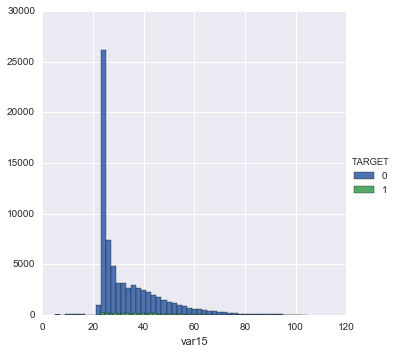

In [31]:
sns.FacetGrid(train, hue='TARGET', size=5) \
    .map(plt.hist, 'var15', bins=50) \
    .add_legend();

In [40]:
# num zeros in a row
train['num_zeros'] = (train == 0).astype(int).sum(axis=1)

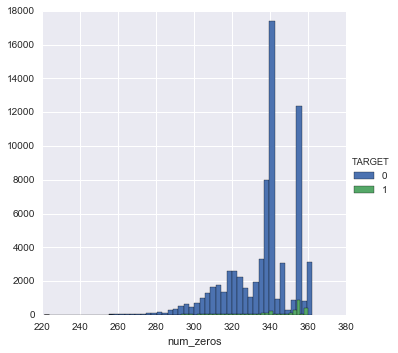

In [41]:
sns.FacetGrid(train, hue='TARGET', size=5) \
    .map(plt.hist, 'num_zeros', bins=50) \
    .add_legend();

In [20]:
X_reduced = X[features]

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
clf = ExtraTreesClassifier()
clf.fit(X_reduced, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
X_test = test[features]

In [23]:
# predictions
predictions = clf.predict_proba(X_test)[:, 1]

In [26]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['TARGET'] = predictions
submission.to_csv('../submissions/baseline_submission.csv', index=False)